# Regression Example: Used Car Price Prediction

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv("E:\ML_course\practice\S6_ML_Simple_Linear_Regression/final_cars_maruti.csv")

In [3]:
cars_df.head(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [4]:
cars_df.shape

(1010, 11)

### Relationship between Age and Price (Numerical values)

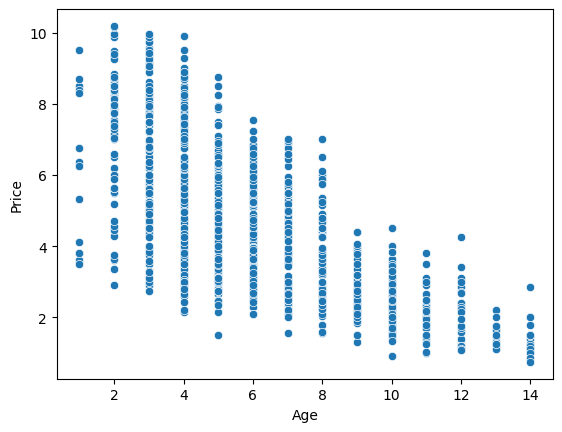

In [5]:
sn.scatterplot(data= cars_df,
               x = "Age",
               y = "Price");

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$
									
- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or 

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Regression Explained: https://mlu-explain.github.io/linear-regression/

### Setting X and Y Variables

In [6]:
X = cars_df[['Age']]
y = cars_df.Price

### Splitting the dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 100)

In [9]:
X_train.shape

(808, 1)

In [10]:
X_test.shape

(202, 1)

### Building the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lreg = LinearRegression()

In [13]:
lreg.fit(X_train,y_train)

LinearRegression()

### Finding the model parameters

In [14]:
lreg.intercept_

7.601234043261615

In [15]:
lreg.coef_

array([-0.49082536])

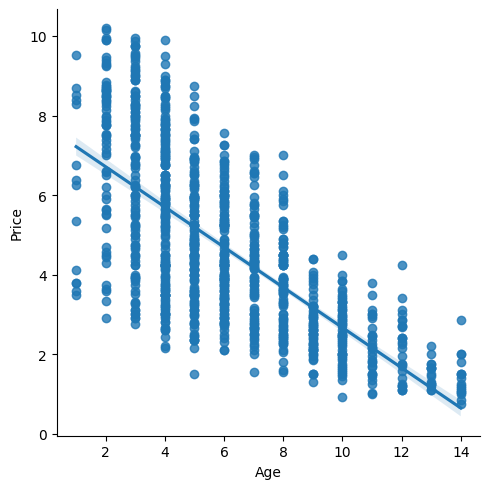

In [16]:
sn.lmplot(data= cars_df,
          x = "Age",
          y = "Price",
          fit_reg= True);

### Predicting on Test Set 

In [17]:
y_pred = lreg.predict(X_test)

In [18]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "Residual": y_test-y_pred})

In [19]:
y_df.sample(10)

,actual,predicted,Residual
771,4.25,6.128758,-1.878758
277,6.84,5.147107,1.692893
391,7.50,6.128758,1.371242
48,8.25,6.619583,1.630417
841,2.20,3.183806,-0.983806
474,3.25,3.674631,-0.424631
966,1.25,1.220504,0.029496
459,3.41,4.656282,-1.246282
433,4.90,4.656282,0.243718
710,5.20,6.128758,-0.928758


### Error or Accuracy Analysis: RMSE

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse = mean_squared_error(y_df.actual, y_df.predicted)
mse

2.548988181999015

In [22]:
rmse = np.sqrt(mse)
rmse

1.5965550983285903

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_df.actual,y_df.predicted)

0.5257066204351251

### Participants Exercise: 1

Build a model based on KM_Driven and price also measure accuracy in terms of RMSE and R2.


In [25]:
cars_df

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83
...,...,...,...,...,...,...,...,...,...,...,...
1005,Bangalore,Petrol,Manual,First,5,4.00,5,celerio,23.10,67.04,67
1006,Pune,Diesel,Manual,First,5,7.43,4,vitara,24.30,88.50,37
1007,Delhi,Diesel,Manual,First,5,2.75,9,swift,19.30,73.90,68
1008,Delhi,Diesel,Manual,First,5,4.75,6,swift,28.40,74.00,27


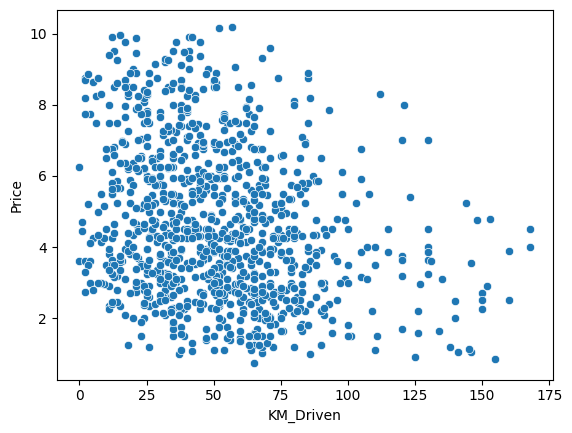

In [26]:
sn.scatterplot(data= cars_df,
               x = "KM_Driven",
               y = "Price");

##### Setting X and Y Variables

In [27]:
X = cars_df[['KM_Driven']]
y = cars_df.Price

##### Splitting the dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.75, random_state= 100)

In [29]:
X_train.shape

(757, 1)

In [30]:
X_test.shape

(253, 1)

##### Building the Model

In [31]:
lreg1 = LinearRegression()

In [32]:
lreg1.fit(X_train,y_train);

##### Finding the model parameters

In [33]:
lreg1.intercept_

5.546368608195236

In [34]:
lreg1.coef_

array([-0.01762422])

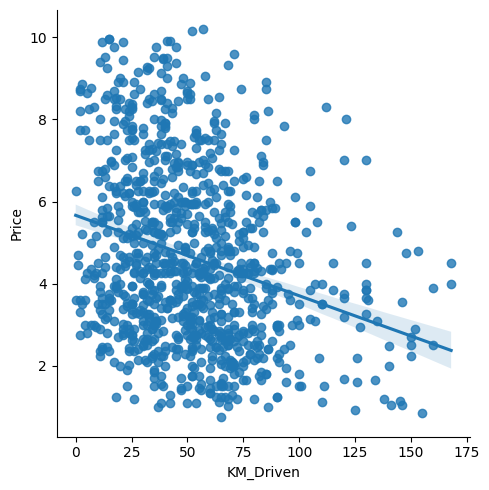

In [35]:
sn.lmplot(data= cars_df,
          x = "KM_Driven",
          y = "Price",
          fit_reg= True);

##### Predicting on Test Set 

In [36]:
y_pred_1 = lreg1.predict(X_test)

In [37]:
y_df_1 = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred_1,
                     "Residual": y_test-y_pred_1})

In [38]:
y_df_1.sample(10)

,actual,predicted,Residual
716,8.20,4.030686,4.169314
381,2.85,4.859024,-2.009024
222,7.05,5.141012,1.908988
19,7.47,4.770903,2.699097
175,3.70,5.158636,-1.458636
891,8.90,4.048310,4.851690
804,5.50,4.947145,0.552855
133,4.40,4.964769,-0.564769
216,4.50,4.171680,0.328320
359,8.10,4.136431,3.963569


##### Error or Accuracy Analysis: RMSE

In [39]:
mse_1 = mean_squared_error(y_df_1.actual, y_df_1.predicted)
mse_1

4.53918751073309

In [40]:
rmse_1 = np.sqrt(mse_1)
rmse_1

2.130536906681762

##### R2 Score

In [41]:
r2_score(y_df_1.actual,y_df_1.predicted)

0.0961661436529806

#### The Value of R2 Score is less than 0.5 and near to 0 so, the model based only on KM_Driven is not good.